# Pandas Basic

### 데이터 불러오기
- `pd.read_csv()`
- `pd.read_excel()`
- `pd.read_sql()`
- `pd.read_json()`
- `pd.read_html()`
- `pd.read_pickle()`

### 불러오기 옵션
- 인코딩: encoding='`utf-8`' or '`ISO-8859-1`' or '`cp949`' or '`utf-8-sig`'
- 구분자: delimiter='`,`' or '`\t`'
- 헤더: header=0 or header=None (0으로 하면 첫 번째 행이 column명으로 사용됨)

### drop() 메서드 옵션

- `labels` 또는 `index`: 제거하려는 열(라벨) 또는 행(index)을 지정. 여러 행이나 열을 동시에 제거하려면 리스트로 지정.
- `axis`: 제거하려는 축을 지정합니다. `axis=0`은 행(인덱스), `axis=1`은 열(라벨)을 의미합니다.
- `level`: 다중 인덱스를 가진 데이터프레임의 경우, 제거하려는 인덱스 레벨을 지정합니다.
- `columns` 또는 `axis=1`일 때 `columns`: 열을 제거할 때 사용합니다. 제거하려는 열(라벨)을 지정합니다.
- `index` 또는 `axis=0`일 때 `index`: 행을 제거할 때 사용합니다. 제거하려는 행(인덱스)을 지정합니다.
- `errors`: 지정한 라벨이 존재하지 않을 경우 발생하는 오류를 처리하는 방법을 설정합니다. 'raise'로 설정하면 오류를 발생시키고, 'ignore'로 설정하면 오류를 발생시키지 않습니다.
- `inplace`: 기본값은 False로, 제거한 결과를 새로운 데이터프레임으로 반환합니다. True로 설정하면 제거한 결과를 원본 데이터프레임에 반영하고 None을 반환합니다.
- `level`: 다중 인덱스를 가진 데이터프레임에서 제거할 레벨을 지정합니다. (다중 인덱스에서 drop하고 싶은 인덱스를 level=''로 지정, 그후 index=''로 제거하고 싶은 인덱스 제거)
- ex) new_df = df.drop(index='group1', level='group')

## pandas 추가 액션
- `.set_index('컬럼', inplace=True)`: 지정한 컬럼을 데이터프레임의 인덱스로 설정합니다. inplace를 True로 설정하면 원본 데이터프레임이 변경됩니다.
- `df['열'].str[:n]`: 문자열 열의 처음 n개의 문자를 추출합니다.
- `df[df['열'].str[:n] == '조건']`: 열의 값이 조건을 만족하는 행을 필터링합니다.
- `df.index.tolist()`: 인덱스 객체를 리스트로 변환합니다.

### concat 함수

`concat` 함수는 여러 개의 데이터프레임을 연결하는 데 사용됩니다.

- `objs`: 연결할 데이터프레임들을 리스트로 전달합니다.
- `axis`: 연결 방향을 지정합니다. 0은 수직(위 아래), 1은 수평(좌 우) 연결을 의미합니다.
- `ignore_index`: 기본값은 False로, 연결된 데이터프레임들의 인덱스를 유지합니다. True로 설정하면 인덱스를 재설정하여 중복되지 않는 인덱스를 부여합니다.
- `keys`: 다중 인덱스를 생성하기 위해 사용됩니다.
- `sort`: 기본값은 False로, 연결된 결과를 정렬하지 않습니다. True로 설정하면 정렬됩니다. (axis에 따라 열 및 행이름 기준으로 정렬)

### merge 함수

`merge` 함수는 데이터프레임을 병합하는 데 사용됩니다.

- `left`: 병합 기준이 되는 데이터프레임입니다.
- `right`: 병합될 데이터프레임입니다.
- `on`: 병합할 때 사용할 열의 이름 또는 열의 이름을 담은 리스트입니다.
- `how`: 병합 방식을 지정합니다. 'inner', 'outer', 'left', 'right' 등이 있습니다.
- `suffixes`: 열 이름이 충돌할 때, 각 데이터프레임의 열 이름 뒤에 붙일 접미사를 지정합니다.
- `left_on`, `right_on`: 왼쪽 데이터프레임과 오른쪽 데이터프레임에서 각각 병합할 열을 지정합니다.
- `left_index`, `right_index`: 인덱스를 병합 기준으로 사용할지 여부를 지정합니다.

### `value_counts()` 활용
```python
df['열'].value_counts() # 도수분포표로 활용 가능
df['열'].value_counts(normalize=True) # 상대도수분포표로 활용 가능(비율로 출력됨)
```

### `apply` 메서드 활용 예시 - 나이 그룹 지정

```python
import pandas as pd

# 샘플 데이터프레임 생성
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 22, 28]}
df = pd.DataFrame(data)

# 나이를 기준으로 나이 그룹을 지정하는 함수
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    else:
        return 'Adult'

# 'Age' 열에 apply 메서드를 사용하여 나이 그룹 열 추가
df['Age Group'] = df['Age'].apply(age_group)

### List Comprehension
```python
squared_even_numbers = [num ** 2 for num in numbers if num % 2 == 0]

## 연속형 변수 범주화: `cut` 함수 사용법
`cut` 함수는 연속형 변수를 지정한 구간(bin)에 따라 구간화합니다. 각 구간의 범위를 사용자가 정의할 수 있습니다.
```python
pd.cut(x, bins, labels=None, right=True, include_lowest=False)
```
- `x`: 구간화할 연속형 변수의 데이터.
- `bins`: 구간(bin)을 지정하는 리스트, 숫자 등. 구간의 경계를 정의합니다.
- `labels`: 생성된 구간의 라벨로 사용할 값들. 기본값은 None이며, 구간의 인덱스로 라벨이 생성됩니다.
- `right`: True일 경우 구간의 오른쪽 경계를 포함합니다. False로 설정하면 왼쪽 경계를 포함합니다. `(default: False)`
- `include_lowest`: True로 설정하면 왼쪽 경계도 포함 `(default: True)`

### cut 사용 예시
```python
age_bins = [0, 18, 25, 35, 50, 100]  # 구간 경계 설정
age_labels = ['<18', '18-24', '25-34', '35-49', '50+']  # 구간별 라벨 설정
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
```

### qcut 사용 예시
`qcut` 함수는 연속형 변수를 지정한 분위수(quantile)에 따라 구간화합니다. 각 구간의 범위가 동일한 데이터 백분위수에 따라 결정됩니다.
```python
pd.qcut(x, q, labels=False, retbins=False, precision=3)
```
- `x`: 구간화할 연속형 변수의 데이터.
- `q`: 분위수의 개수 또는 분위수 리스트. 예: 4, [0, 0.25, 0.5, 0.75, 1.0]
- `labels`: 생성된 구간의 라벨로 사용할 값들. 기본값은 False이며, 숫자로 라벨이 생성됩니다.
- `retbins`: True로 설정하면 구간(bin) 경계를 반환합니다.
- `precision`: 구간 경계의 소수점 자릿수.

```python
df['Quantile Age Group'] = pd.qcut(df['Age'], q=3, labels=['Q1', 'Q2', 'Q3'])
```

## Groupby와 Aggregation
```python
grouped = train.groupby('LandContour')['SalePrice'].agg(['mean','sum','count','median'])
```
- train을 LandContour 컬럼을 기준으로 그룹화하여 나타내고 SalePrice열만 가져옴, 그 후 평균,합 등의 함수를 적용하여 Dataframe형태로 보여줌

## Pivot과 Pivot_table
- pivot: 데이터프레임의 열을 행 인덱스와 열로 재구성합니다.
- pivot_table: 중복된 값들을 집계하여 피벗테이블을 생성합니다.
```python
pivot_df = df.pivot(index='Date', columns='Category', values='Value')
pivot_table_df = df.pivot_table(columns='Category', values='Value', aggfunc='mean')
```

#### 문자열을 datetime 형태로 변환
```python
df['Date'] = pd.to_datetime(df['Date'])
```

#### 문자열 data에서 원하는 문자열 추출
```python
df['Date'].str[:4] # 4글자 추출
df['Name'].str.split(' ') # 공백을 기준으로 문자열 분리
df[df['Name'].str.contains('Countess')] # 특정 문자열을 포함하는 행 추출
```
```

#### 여러 정렬 기법
```python
df.sort_values(by=['col1', 'col2'], ascending=[True, False]) # col1을 오름차순으로 정렬하고, col2를 내림차순으로 정렬
df['col1'].sort_values(ascending=False) # col1을 내림차순으로 정렬
df.sort_index() # 인덱스를 기준으로 정렬
df[df['Name'].str.contains('Mr')].sort_values(by='Age') # 특정 문자열을 포함하는 행을 추출한 후, 나이를 기준으로 정렬
```

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
# ", "기준으로 뒷 문자열 추출 후 "."기준으로 앞 문자열 추출 (Mr, Mrs, Miss, Master 등만 남게)
df['Name'] = df['Name'].str.split(', ').str[1].str.split('.').str[0]
df['Name'].value_counts().head(5)

Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Name: Name, dtype: int64

<Axes: xlabel='Name', ylabel='count'>

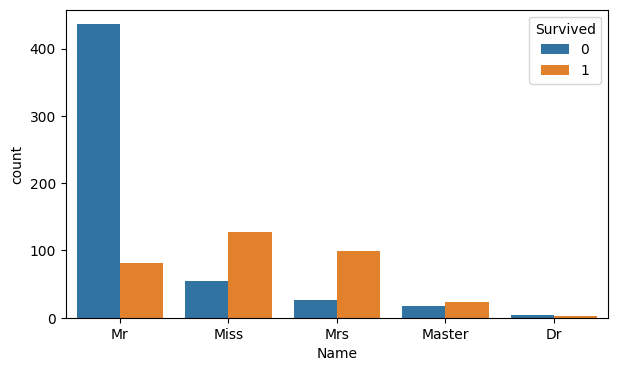

In [86]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df[df['Name'].str.contains('Mr|Mrs|Miss|Master|Dr')], x='Name', hue='Survived', order=df[df['Name'].str.contains('Mr|Mrs|Miss|Master|Dr')]['Name'].value_counts().sort_values(ascending=False).index)

In [81]:
df['Age'].fillna(df.groupby('Name')['Age'].transform('median'), inplace=True)
df['Age'].isnull().sum()

0

In [82]:
df['Age'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 70, 150], labels=[0, 1, 2, 3, 4, 5, 6], right=False)

In [83]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,2,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,2,0,0,STON/O2. 3101282,7.9250,NaN,S
